<a href="https://colab.research.google.com/github/Namain231/1st_words/blob/master/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv(r"/content/housing.csv")
df = pd.DataFrame(data)

print("Dimensions of Housing Dataframe:", (df.shape), "\n")
print("Rows:", df.shape[0])
display( df.head())
print("\n")
display(df.describe())

Dimensions of Housing Dataframe: (20640, 10) 

Rows: 20640


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


,index,min,max,mean,median,std
0,longitude,-124.3500,-114.3100,-119.569704,-118.4900,2.003532
1,latitude,32.5400,41.9500,35.631861,34.2600,2.135952
2,housing_median_age,1.0000,52.0000,28.639486,29.0000,12.585558
3,total_rooms,2.0000,39320.0000,2635.763081,2127.0000,2181.615252
4,total_bedrooms,1.0000,6445.0000,537.870553,435.0000,421.385070
5,population,3.0000,35682.0000,1425.476744,1166.0000,1132.462122
6,households,1.0000,6082.0000,499.539680,409.0000,382.329753
7,median_income,0.4999,15.0001,3.870671,3.5348,1.899822
8,median_house_value,14999.0000,500001.0000,206855.816909,179700.0000,115395.615874


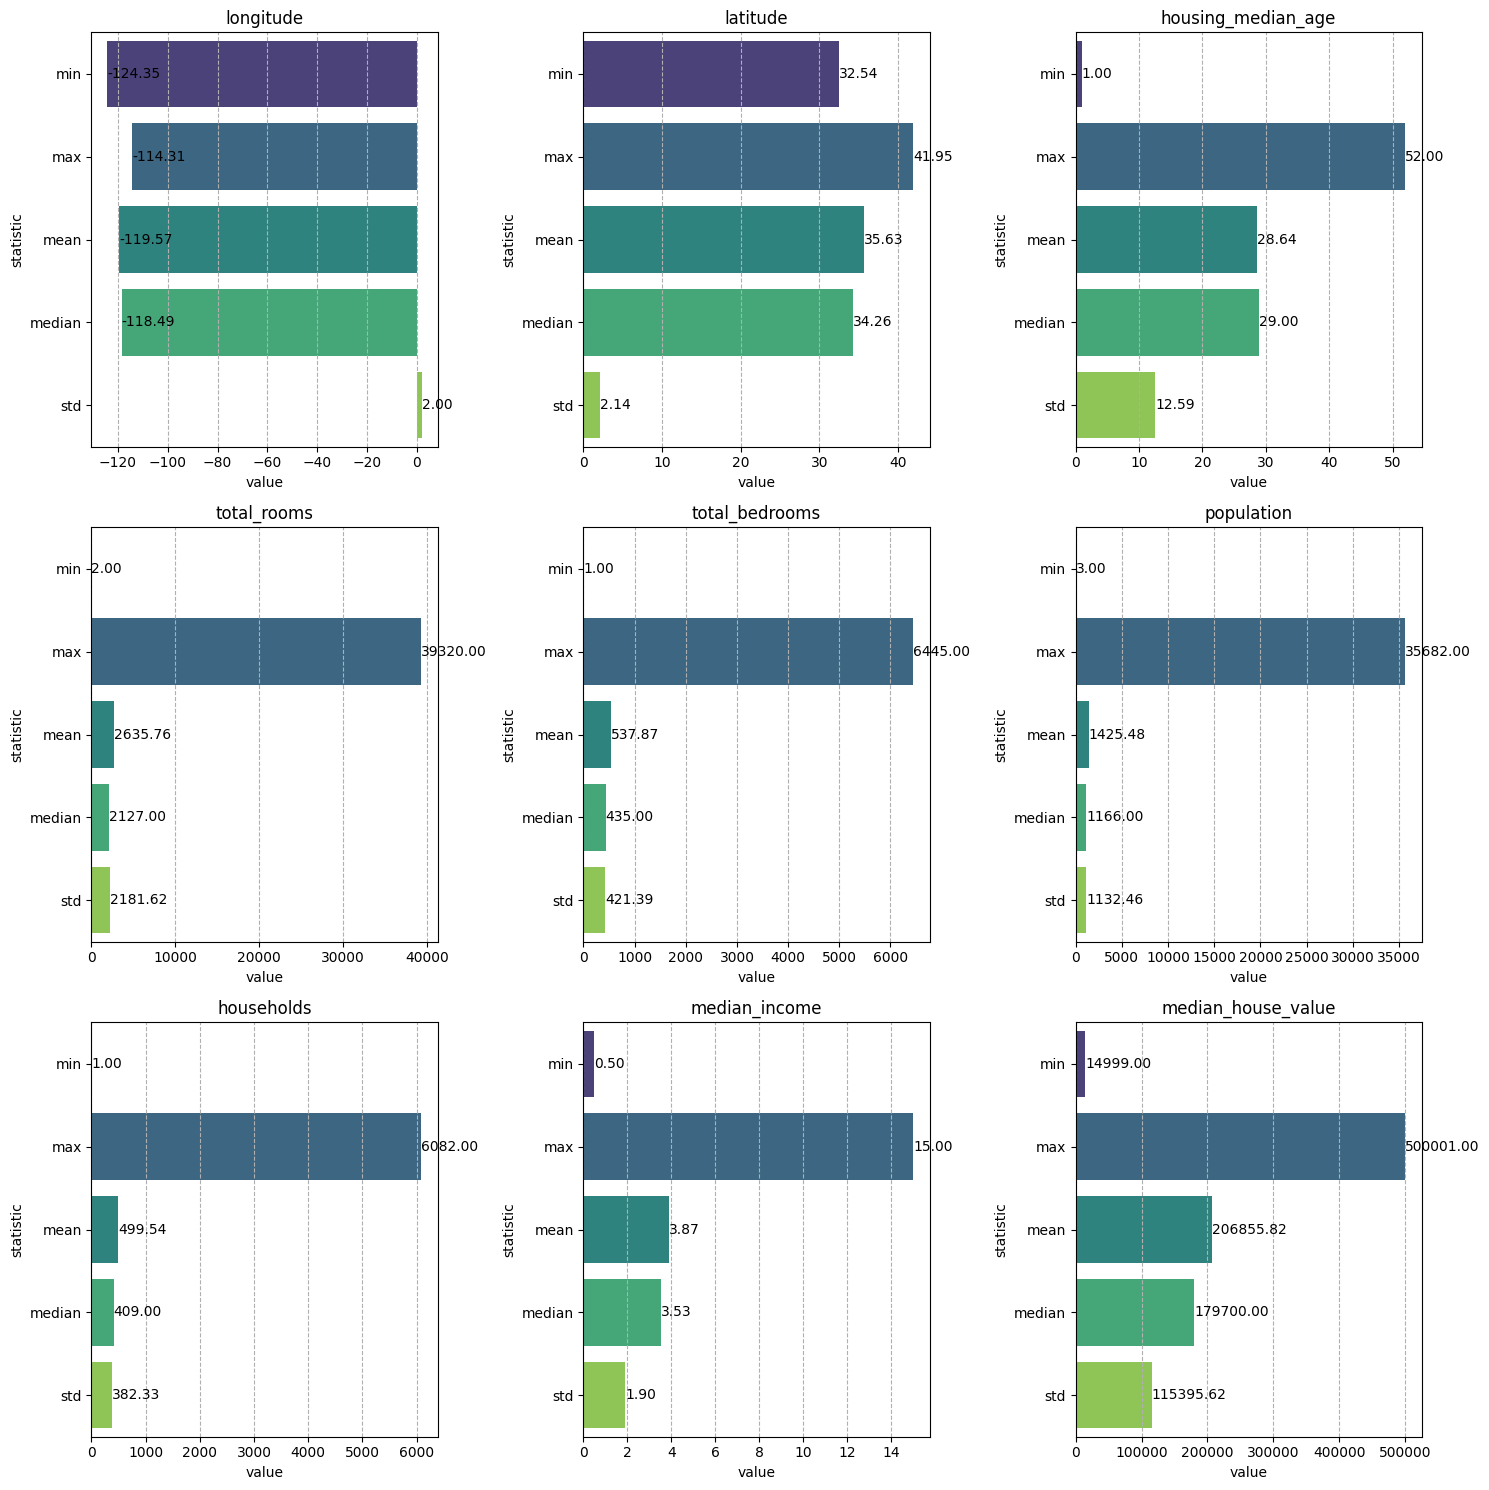

In [ ]:
def Visualizer(df):
  df_numerical = df.select_dtypes(include=np.number)
  df_stats = df_numerical.describe().transpose()
  df_viz = df_stats[['min', 'max', 'mean', '50%', 'std']].reset_index()
  df_viz = df_viz.rename(columns={'50%': 'median'})
  display(df_viz)

  df_melted = df_viz.melt(id_vars='index', value_vars=['min', 'max', 'mean', 'median', 'std'], var_name='statistic', value_name='value')
  num_features = len(df_melted['index'].unique())
  n_cols = 3
  n_rows = (num_features + n_cols - 1) // n_cols

  fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
  axes = axes.flatten()

  for i, feature in enumerate(df_melted['index'].unique()):
      ax = axes[i]
      feature_data = df_melted[df_melted['index'] == feature]
      sns.barplot(x='value', y='statistic', data=feature_data, ax=ax, palette='viridis', hue = 'statistic')
      ax.set_title(feature)
      ax.grid(axis='x', linestyle='--')
      for j, v in enumerate(feature_data['value']):
          ax.text(v, j, f'{v:.2f}', color='black', va='center')

  for i in range(num_features, len(axes)):
      fig.delaxes(axes[i])

  plt.tight_layout()
  plt.show()

Visualizer(df)

Number of duplicates:  0
Number of missing values:  0
Columns with missing values:  []


,index,min,max,mean,median,std
0,longitude,-124.3500,-114.3100,-119.569704,-118.4900,2.003532
1,latitude,32.5400,41.9500,35.631861,34.2600,2.135952
2,housing_median_age,1.0000,52.0000,28.639486,29.0000,12.585558
3,total_rooms,2.0000,39320.0000,2635.763081,2127.0000,2181.615252
4,total_bedrooms,1.0000,6445.0000,537.870553,438.0000,419.266592
5,population,3.0000,35682.0000,1425.476744,1166.0000,1132.462122
6,households,1.0000,6082.0000,499.539680,409.0000,382.329753
7,median_income,0.4999,15.0001,3.870671,3.5348,1.899822
8,median_house_value,14999.0000,500001.0000,206855.816909,179700.0000,115395.615874


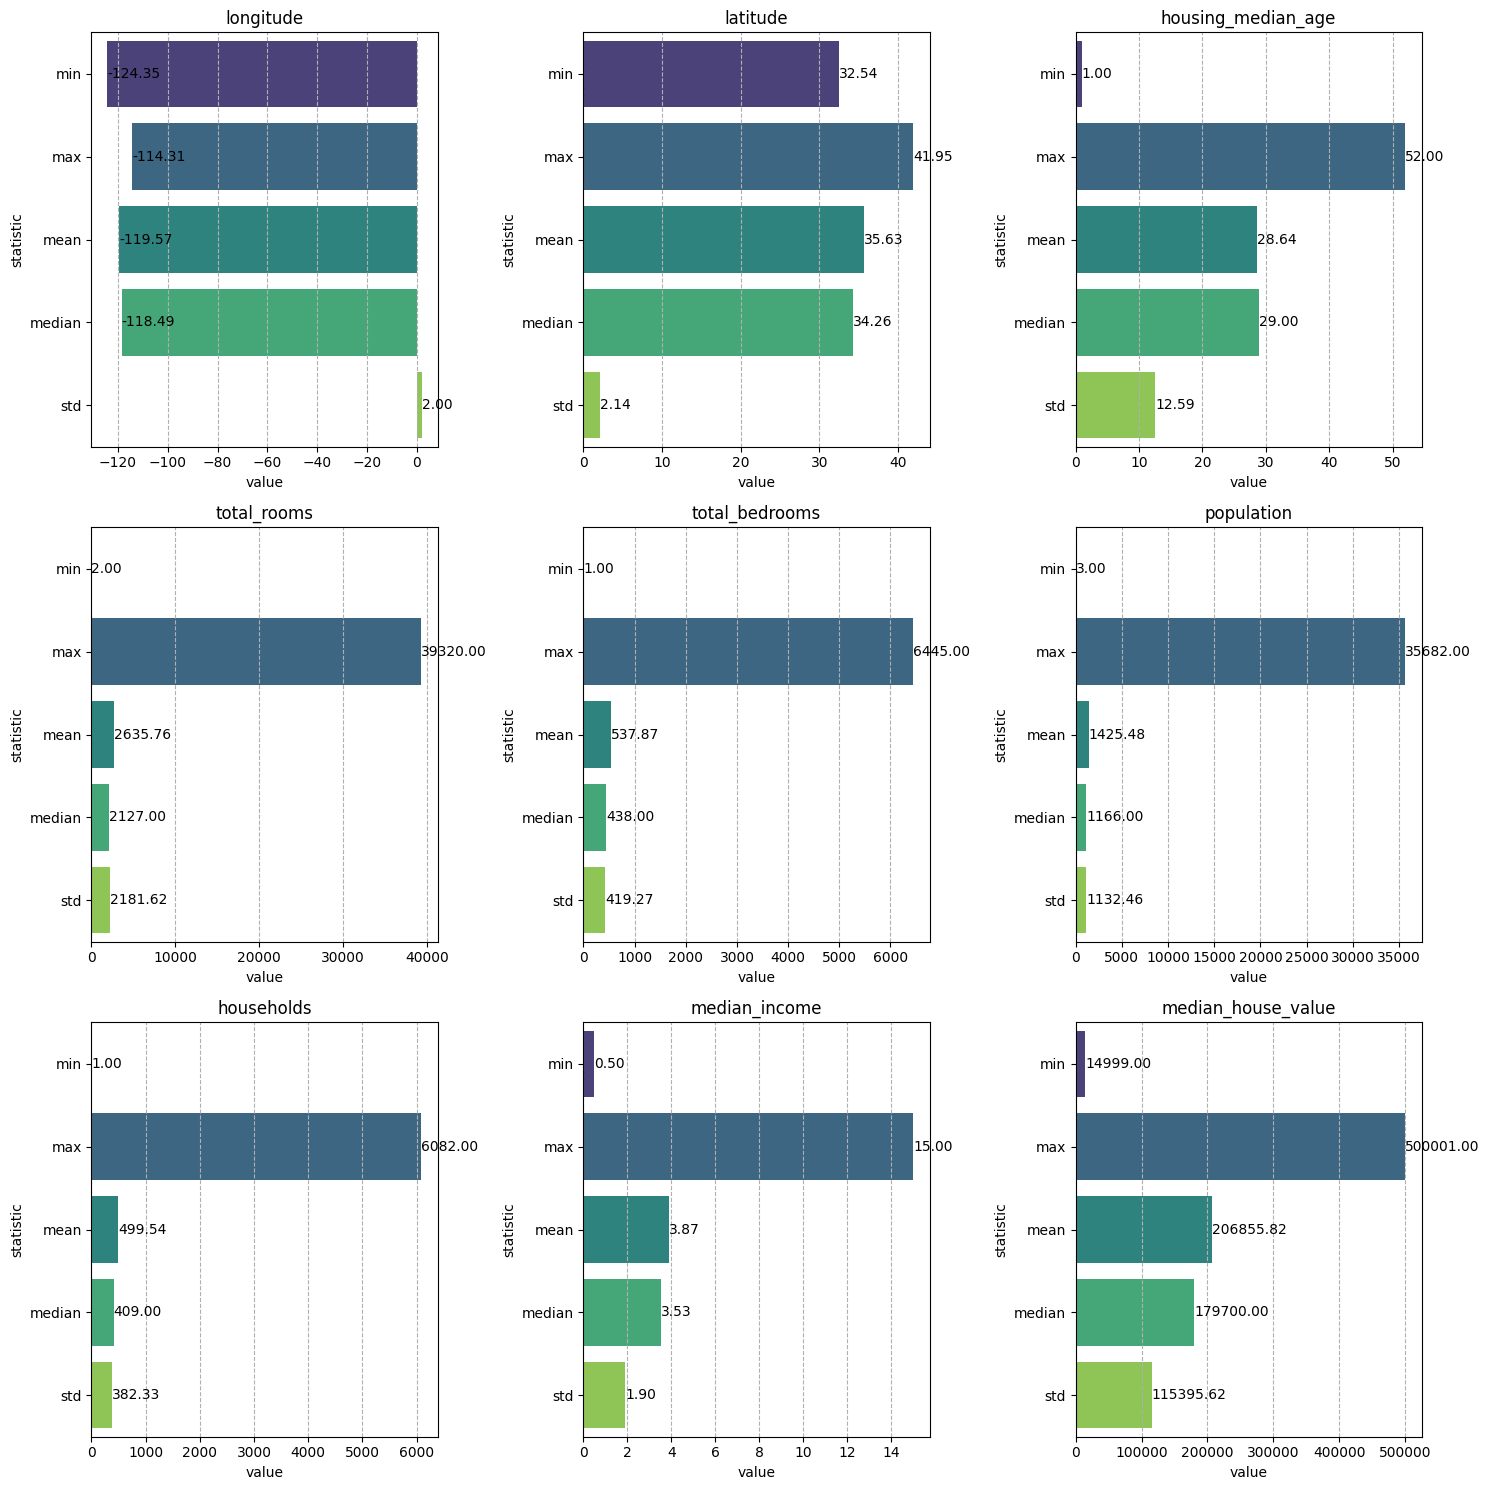

In [35]:
print("Number of duplicates: " , df.duplicated().sum())
print("Number of missing values: " , df.isna().sum().sum())

numerical_cols = df.select_dtypes(include=np.number).columns
missing_values_per_column = df[numerical_cols].isna().sum()
numerical_cols_with_missing_values = missing_values_per_column[missing_values_per_column > 0].index.tolist()
print("Columns with missing values: ", numerical_cols_with_missing_values)
for col in numerical_cols_with_missing_values:
    if df[col].std() > df[col].mean():
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mean())

df['ocean_proximity'] = df['ocean_proximity'].fillna(df['ocean_proximity'].mode())
df.drop_duplicates(inplace=True)
Visualizer(df)


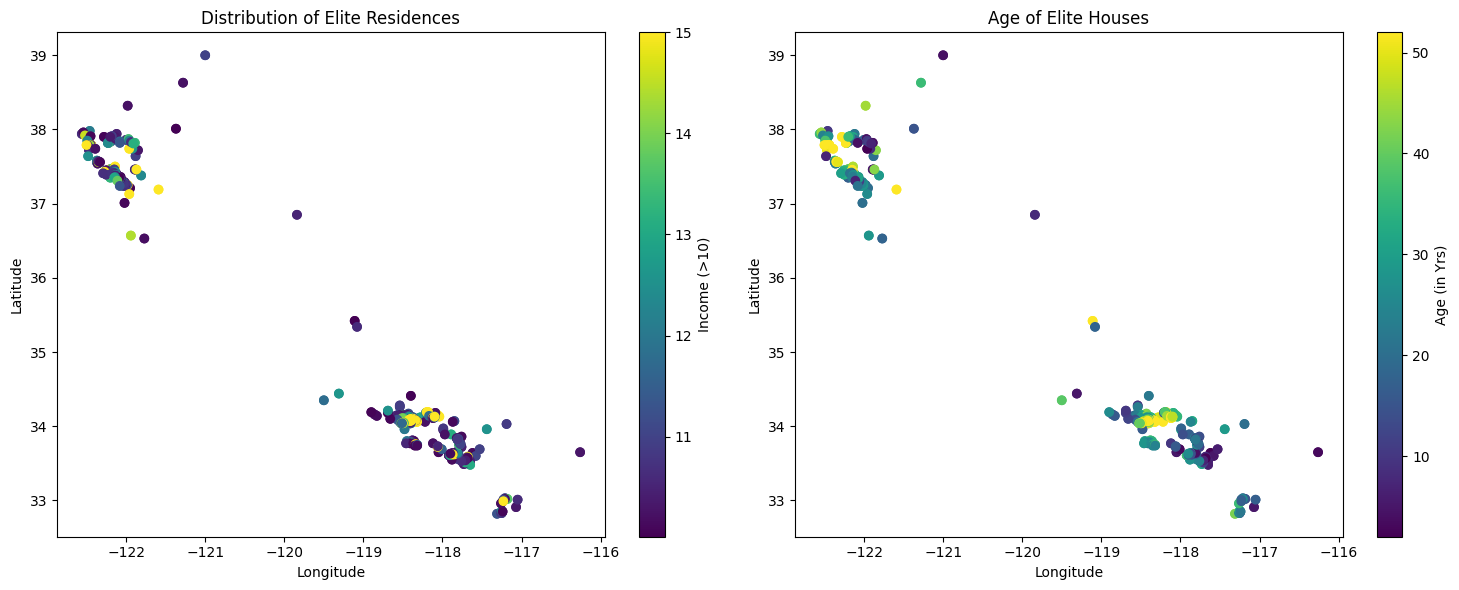

In [69]:

median_income_val = df['median_income'].median()
df_above_median_income = df[df['median_income'] > 10]

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# First subplot: Median Income vs Location for areas with above-median income
axes[0].scatter(df_above_median_income['longitude'], df_above_median_income['latitude'], c=df_above_median_income['median_income'])
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')
fig.colorbar(axes[0].scatter(df_above_median_income['longitude'], df_above_median_income['latitude'], c=df_above_median_income['median_income']), ax=axes[0], label='Income (>10-)')
axes[0].set_title('Distribution of Elite Residences')

# Second subplot: Age of the Elite residences

#median_house_age = df['housing_median_age'].median()
#df_above_median_age = df[df['housing_median_age'] > 40]
axes[1].scatter(df_above_median_income['longitude'], df_above_median_income['latitude'], c=df_above_median_income['housing_median_age'])
axes[1].set_xlabel('Longitude')
axes[1].set_ylabel('Latitude')
fig.colorbar(axes[1].scatter(df_above_median_income['longitude'], df_above_median_income['latitude'], c=df_above_median_income['housing_median_age']), ax=axes[1], label='Age (in Yrs)')
axes[1].set_title('Age of Elite Houses')

plt.tight_layout()
plt.show()

housing_median_age                            total_rooms  \
                              mean median min max        std         mean   
ocean_proximity                                                             
0                        29.279225   30.0   2  52  11.644453  2628.343586   
1                        24.271867   23.0   1  52  12.018020  2717.742787   
2                        42.400000   52.0  27  52  13.164346  1574.600000   
3                        37.730131   39.0   2  52  13.070385  2493.589520   
4                        29.347254   29.0   2  52  11.840371  2583.700903   

                                                  ... median_income           \
                 median  min    max          std  ...          mean   median   
ocean_proximity                                   ...                          
0                2108.0   11  37937  2160.463696  ...      4.230682  3.87500   
1                2131.0    2  39320  2385.831111  ...      3.208996  2.98770   
2                1675.0  716   2359   707.545264  ...      2.744420  2.73610   
3                2083.0    8  18634  1830.817022  ...      4.172885  3.81865   
4                2195.0   15  30405  1990.724760  ...      4.005785  3.64705   

                                           median_house_value            \
                    min      max       std               mean    median   
ocean_proximity                                                           
0                0.4999  15.0001  2.001223      240084.285464  214850.0   
1                0.4999  15.0001  1.437465      124805.392001  108500.0   
2                2.1579   3.3906  0.444180      380440.000000  414700.0   
3                0.4999  15.0001  2.017427      259212.311790  233800.0   
4                0.5360  15.0001  2.010558      249433.977427  229450.0   

                                                
                    min     max            std  
ocean_proximity                                 
0                 17500  500001  106124.292213  
1                 14999  500001   70007.908494  
2                287500  450000   80559.561816  
3                 22500  500001  122818.537064  
4                 22500  500001  122477.145927  

[5 rows x 35 columns]

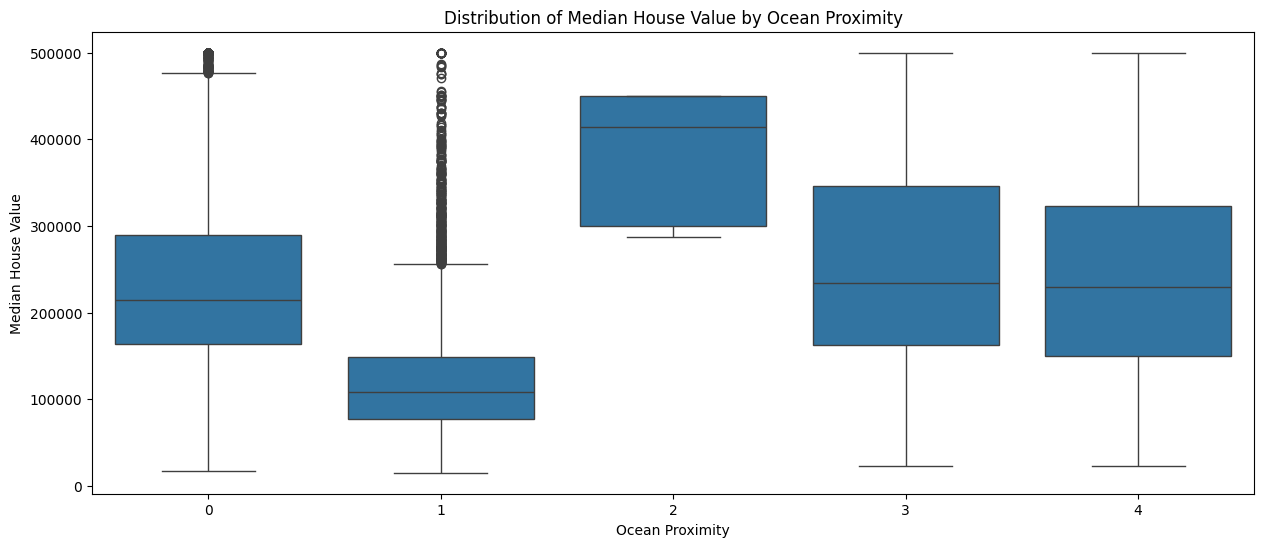

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,3
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,3
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,3
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,3
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,3


In [76]:
ocean_proximity_stats = df.groupby('ocean_proximity').agg({
    'housing_median_age': ['mean', 'median', 'min', 'max', 'std'],
    'total_rooms': ['mean', 'median', 'min', 'max', 'std'],
    'total_bedrooms': ['mean', 'median', 'min', 'max', 'std'],
    'population': ['mean', 'median', 'min', 'max', 'std'],
    'households': ['mean', 'median', 'min', 'max', 'std'],
    'median_income': ['mean', 'median', 'min', 'max', 'std'],
    'median_house_value': ['mean', 'median', 'min', 'max', 'std']
})
display(ocean_proximity_stats)
plt.figure(figsize=(15, 6))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=df)
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.title('Distribution of Median House Value by Ocean Proximity')
plt.show()

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['ocean_proximity'] = label_encoder.fit_transform(df['ocean_proximity'])
display(df.head())

Data Analysis Key Findings

The ocean_proximity categories show distinct differences in median_house_value. The "NEAR OCEAN" and "ISLAND" categories have the highest average median house values ($249,433 and $380,440 respectively), while "INLAND" has the lowest ($124,805).

The box plot visualization confirms the disparity in median_house_value distribution across ocean_proximity categories, with "NEAR OCEAN" and "ISLAND" showing higher median values and wider distributions compared to "INLAND".

The ocean_proximity categorical variable has been successfully encoded into numerical representations using LabelEncoder, preparing it for potential use in numerical models.

The ocean_proximity feature appears to be a significant predictor of median_house_value and should be included in any predictive modeling efforts.
Further investigation into the "ISLAND" category is warranted due to its very high median house value and small sample size (implied by the summary statistics).

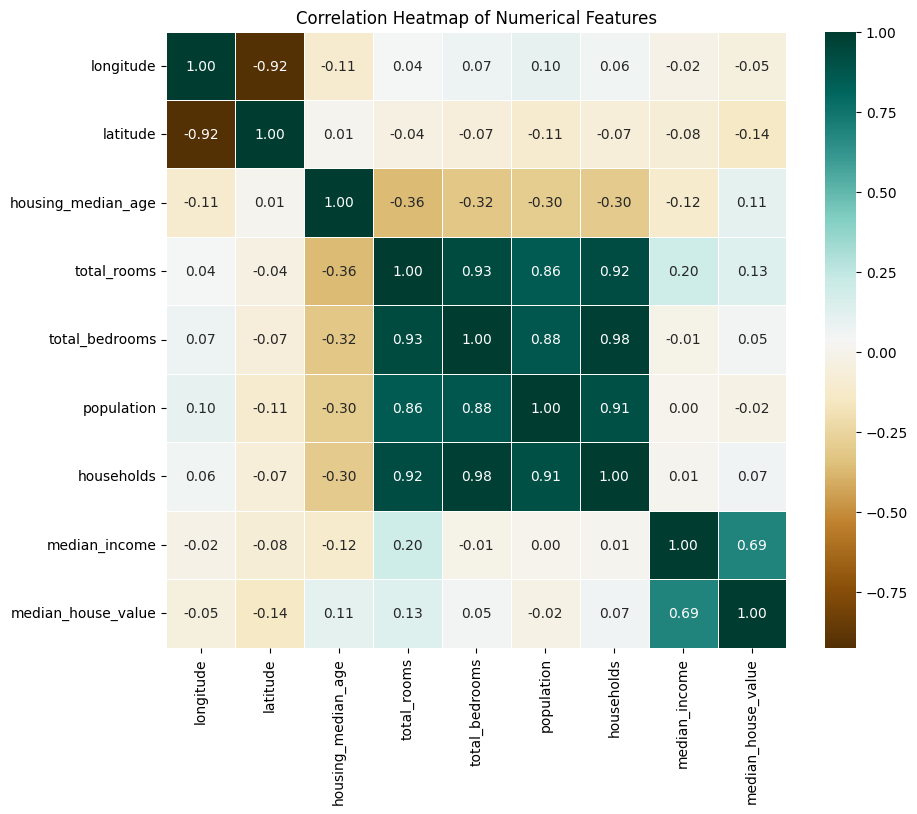

In [106]:
numerical_cols = data.select_dtypes(include=np.number)

#heatmap
correlation_matrix = numerical_cols.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='BrBG', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

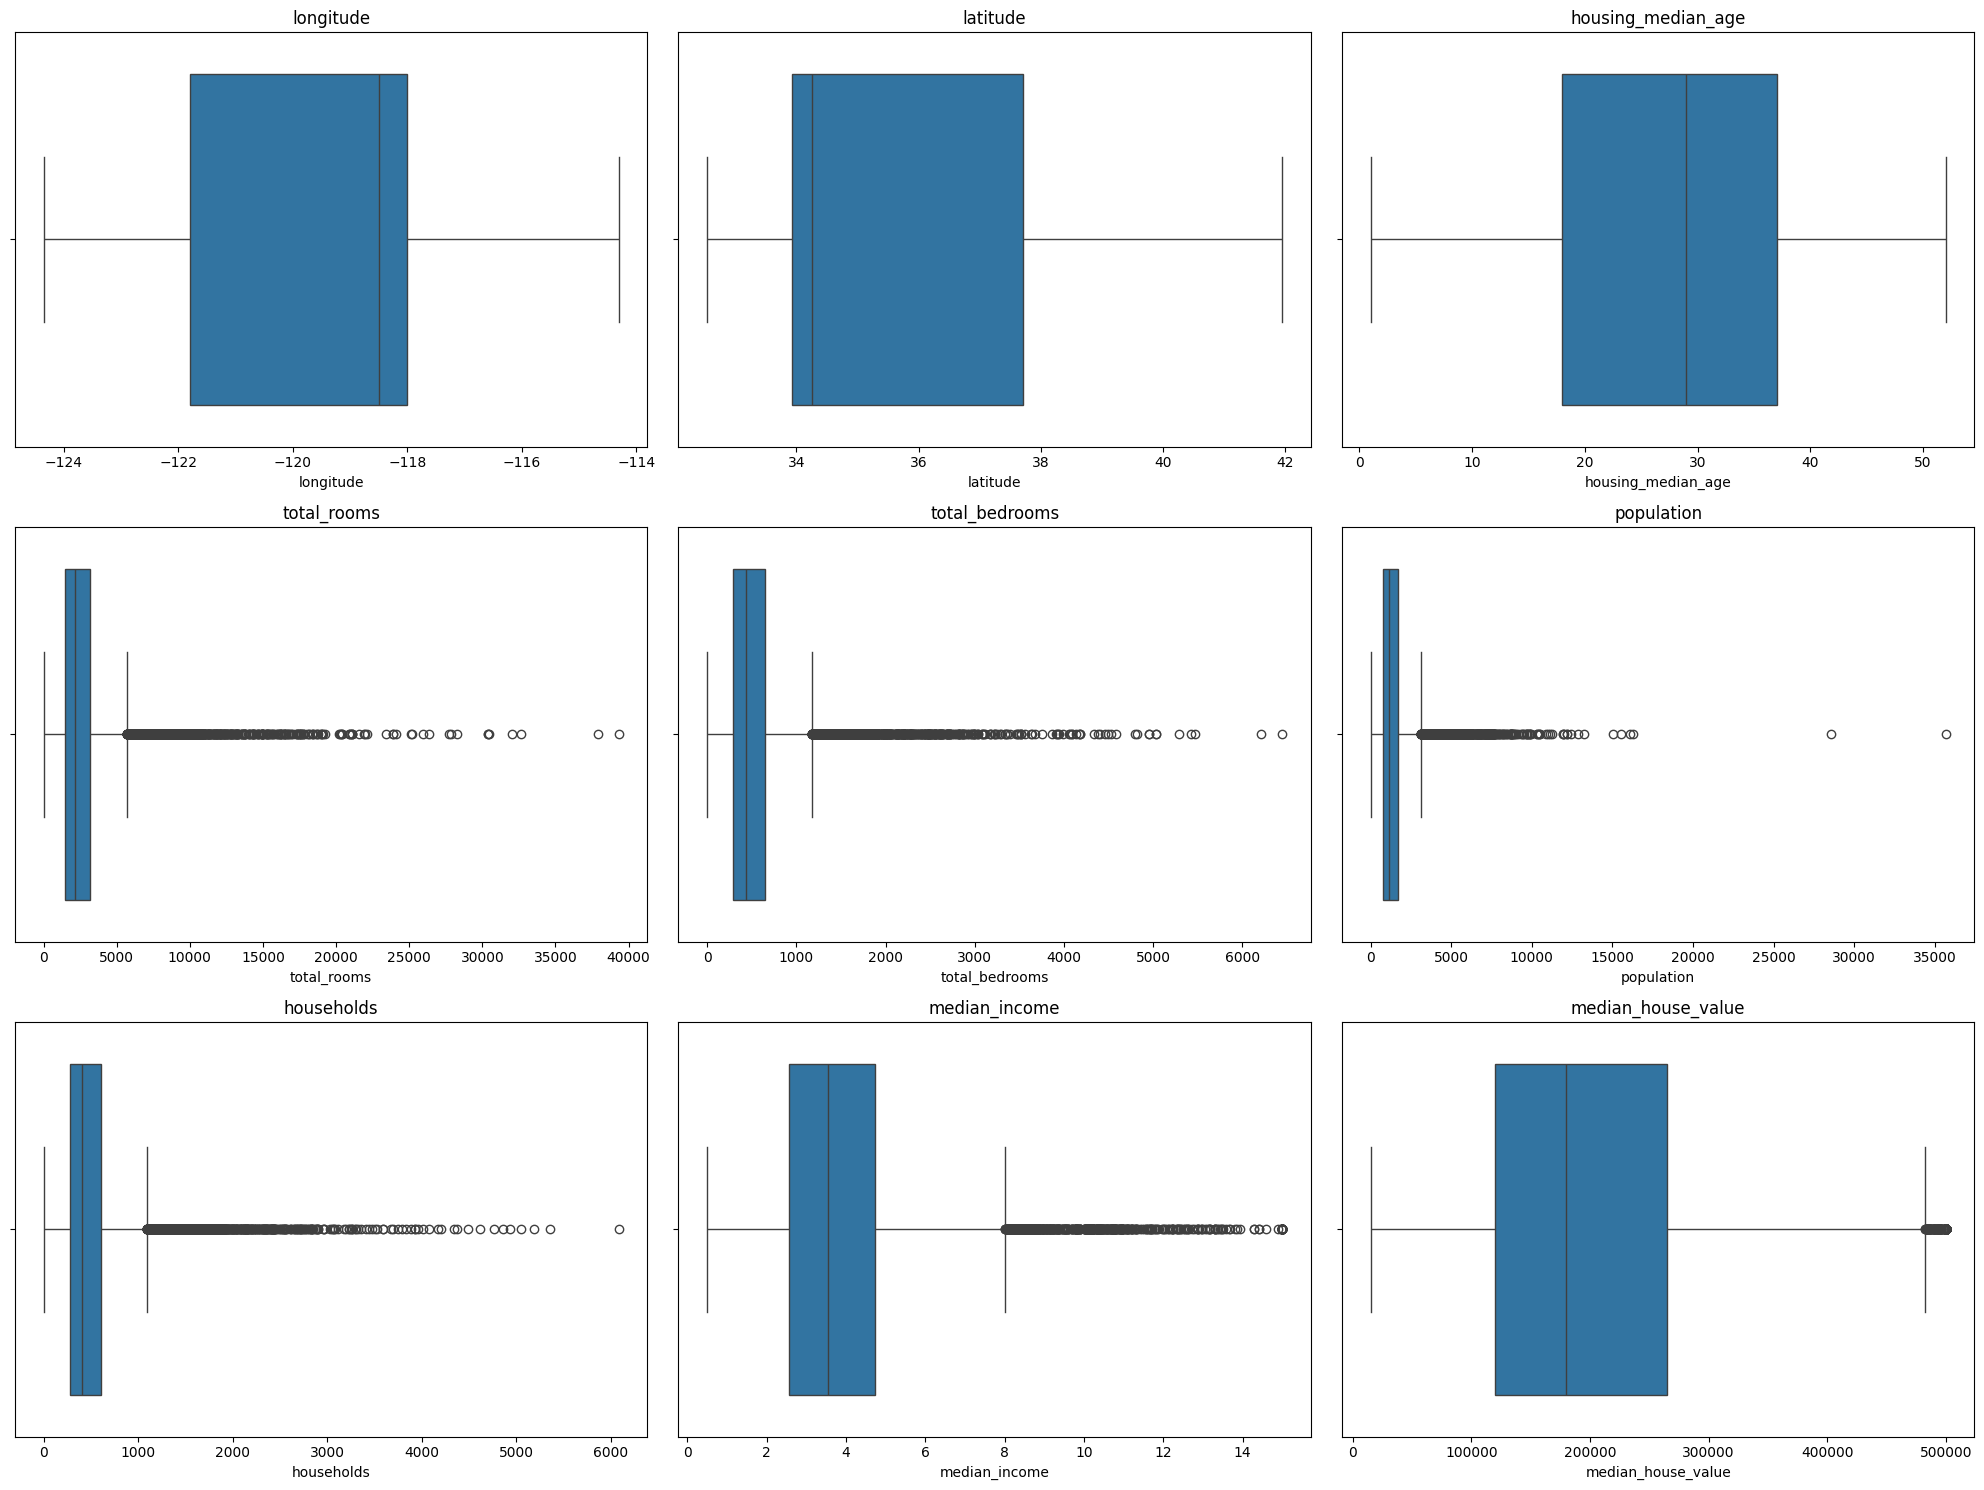

In [118]:
#Box Plots
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=numerical_cols[col])
    plt.xlabel(col)
    plt.title(col)
    plt.ylabel('')
plt.tight_layout()
plt.show()

/tmp/ipython-input-2218928801.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ocean_proximity', y='median_house_value', data=df_premium, palette='viridis', ax=axes[0])
/tmp/ipython-input-2218928801.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cost_per_room', y='median_house_value', data=df_premium, palette='viridis', ax=axes[1])


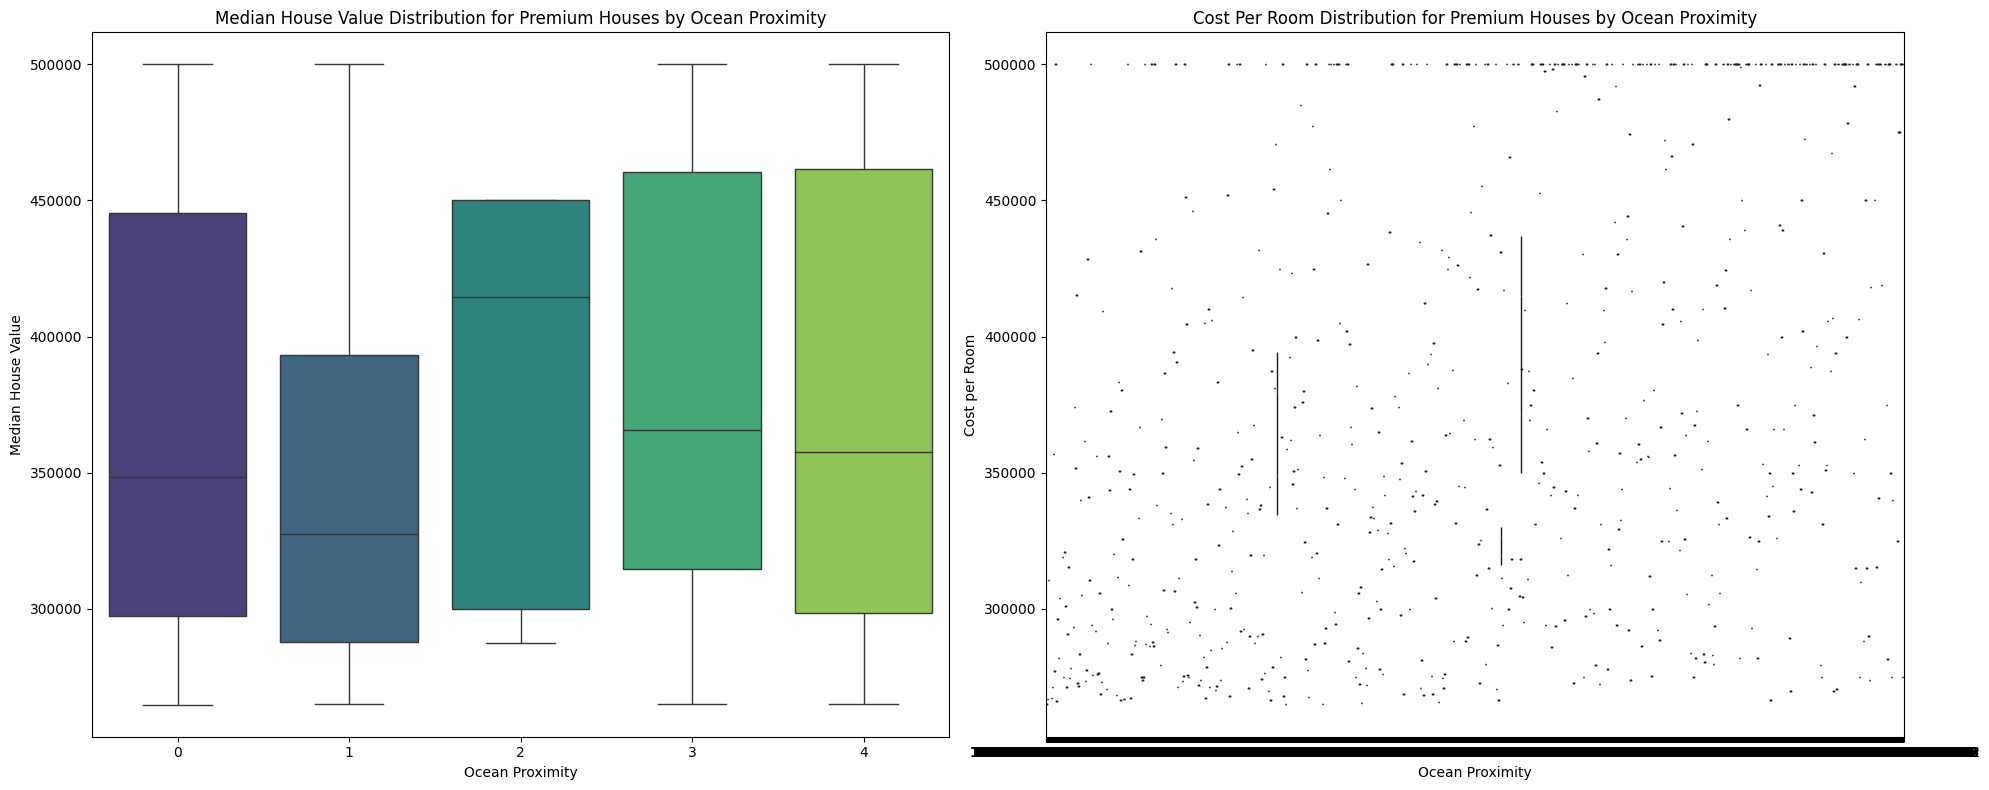

In [134]:
df['cost_per_room'] = df['median_house_value'] / df['total_rooms']
premium_threshold = df['median_house_value'].quantile(0.75)
df_premium = df[df['median_house_value'] >= premium_threshold]

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# First subplot: Median House Value Distribution for Premium Houses by Ocean Proximity
sns.boxplot(x='ocean_proximity', y='median_house_value', data=df_premium, palette='viridis', ax=axes[0])
axes[0].set_title('Median House Value Distribution for Premium Houses by Ocean Proximity')
axes[0].set_xlabel('Ocean Proximity')
axes[0].set_ylabel('Median House Value')

# Second subplot: Cost Per Room Distribution for Premium Houses by Ocean Proximity
sns.boxplot(x='cost_per_room', y='median_house_value', data=df_premium, palette='viridis', ax=axes[1])
axes[1].set_title('Cost Per Room Distribution for Premium Houses by Ocean Proximity')
axes[1].set_xlabel('Ocean Proximity')
axes[1].set_ylabel('Cost per Room')


plt.tight_layout()
plt.show()